![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTAjFK-jiwKiI_9SYealAxaMM-706vqrUAL8A&usqp=CAU)
# <center> Text Analysis on Financial News </center>

Authors: Alexander Andreevskiy, Marina Ananyeva

This is the introduction to vanilla natural language processing (NLP). We will try to preprocess text data and to perform the first steps in sentiment analysis.  

Today we will try the following methods:

1. Converting text to uppercase/lowercase
2. Word tokenization
3. Sentence tokenization
4. Lemmatize
5. Stemming
6. Spell Check
7. Remove numbers
8. Remove punctuation
9. Delete stopwords

In [ ]:
!pip install newspaper3k
!pip install wordcloud
!pip install autocorrect

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string

In [2]:
from newspaper import Article

In [3]:
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/m.ananyeva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/m.ananyeva/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Exploring the data

We begin by parsing article from *Seeking Alpha*, popular financial website.

If parsing causes errors, reload Colab (or your Jupyter notebook) and try again.

In [4]:
article = Article('https://seekingalpha.com/article/4377885-apples-5g-iphone-delay-may-send-stock-lower')

In [5]:
article.download()
article.parse()

Let's look into the description of the article

In [6]:
article.title

"Apple's 5G iPhone Delay May Send The Stock Lower (NASDAQ:AAPL)"

In [7]:
article.authors

['Mott Capital Management']

In [8]:
date = article.publish_date
print(date)
print(type(date))

2020-10-06 21:07:20+00:00
<class 'datetime.datetime'>


Do you remember how to convert datetime to string?

In [9]:
date.strftime('%Y-%m-%d')

'2020-10-06'

Extract text from the article:

In [10]:
article.text

"Apple (AAPL) stock has fallen about 15% from its recent highs. However, the stock may be at risk of dropping further. There are plenty of catalysts that could trigger such a drop, with earnings at the end of October and a continued delay in launching its 5G iPhone, although it appears the company will host an event on Oct. 13. Analysts are estimating significant earnings growth for the company in its fiscal first quarter. However, if the new iPhone fails to launch in time, those first quarter estimates may be too high. It's a significant risk for the stock, given that its valuation is historically high due to massive expectations.\n\nIt could be one reason why options traders are betting that the stock declines in the weeks ahead. Meanwhile, the technical chart shows Apple's struggles and suggests that the shares fall significantly from its current price. You can track all of my articles on Seeking Alpha on this Google spreadsheet.\n\nEstimates May Need To Come Down\n\nCurrently, anal

In [11]:
data = article.text
data

"Apple (AAPL) stock has fallen about 15% from its recent highs. However, the stock may be at risk of dropping further. There are plenty of catalysts that could trigger such a drop, with earnings at the end of October and a continued delay in launching its 5G iPhone, although it appears the company will host an event on Oct. 13. Analysts are estimating significant earnings growth for the company in its fiscal first quarter. However, if the new iPhone fails to launch in time, those first quarter estimates may be too high. It's a significant risk for the stock, given that its valuation is historically high due to massive expectations.\n\nIt could be one reason why options traders are betting that the stock declines in the weeks ahead. Meanwhile, the technical chart shows Apple's struggles and suggests that the shares fall significantly from its current price. You can track all of my articles on Seeking Alpha on this Google spreadsheet.\n\nEstimates May Need To Come Down\n\nCurrently, anal

In [12]:
len(article.text)

4877

We can also extract some high-level information about the text with the help of nlp() method:

In [13]:
article.nlp()

Brief summary of the article:

In [14]:
summary = article.summary
print(summary, sep='\n')

Analysts are estimating significant earnings growth for the company in its fiscal first quarter.
However, if the new iPhone fails to launch in time, those first quarter estimates may be too high.
It's a significant risk for the stock, given that its valuation is historically high due to massive expectations.
Despite the uncertainty, the stock is currently trading at a very high earnings multiple—nearly 31 times 2021 earnings estimates.
Betting Shares DropThis high valuation and uncertainty surrounding the iPhone could be one reason why some options traders are betting that Apple's stock falls by the time November rolls around.


Keywords of the article:

In [15]:
keywords = article.keywords
print(*keywords, sep='\n')

earnings
high
quarter
stock
apples
send
nasdaqaapl
technical
significant
valuation
5g
puts
lower
delay
growth
iphone


### NLP pipeline

Next we will go through the standard procedure of text analysis and visualise our data. 

We begin by **pre-processing our text**:


*   convert sentences to lowercase, remove digits and punctuation
*   tokenize text (split sentences into words)
*   delete stop-words ("noisy" words which don't convey useful information)
*   perform lemmatising (extraction of lemma - morphological basis of the word).

Let's do it step-by-step:

In [16]:
data = article.text

We usually remove numbers when we do text clustering or getting keyphrases as we numbers doesn’t give much importance to get the main words. 

In [17]:
# convert sentences to lowercase, remove digits and punctuation
# isnumeric()
data = "".join([i for i in list(data) if (not i.isdigit() and i not in string.punctuation)]).lower()
#data

In [18]:
from nltk.tokenize import WordPunctTokenizer
tkz = WordPunctTokenizer()

Tokenize words to get the tokens of the text. It breaks the sentences into list of words.

In [19]:
# split string into paragraphs
data = data.split('\n\n') 
# tokenize each paragraph
data = [tkz.tokenize(x) for x in data]
# data

In [ ]:
# Task
# How we could split it into sentences?

In [20]:
# using nltk
word_tokens = nltk.word_tokenize("Let's divide this string into words. It is easy")
print(word_tokens)

['Let', "'s", 'divide', 'this', 'string', 'into', 'words', '.', 'It', 'is', 'easy']


If there are more than one sentence, split it. It means breaking the sentences to a list of strings.

In [22]:
sent_tokens = nltk.sent_tokenize("Let's divide this string into sentences. It is easy too!")
print(sent_tokens)

["Let's divide this string into sentences.", 'It is easy too!']


In [23]:
# remove stop-words
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/m.ananyeva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# take a quick-look at stop-words
stopwords.words('english')[:15]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

In [25]:
# remove stop_words 
stop_words = set(stopwords.words('english'))
for i in range(len(data)):
    data[i] = [x for x in data[i] if x not in stop_words]

# data

Stemming and Lemmatization both generate the root form of the inflected words. The difference is that stem might not be an actual word whereas, lemma is an actual language word. 

In [26]:
# lemmatize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
  
lmt = WordNetLemmatizer() 

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/m.ananyeva/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Some examples of lemmatization:

In [27]:
print("companies ->", lmt.lemmatize("companies")) 
print("worse ->", lmt.lemmatize("worse", pos='a')) # pos='a' means that we want adjective as the output 

companies -> company
worse -> bad


In [28]:
# lemmatize our data
for i in range(len(data)):
    data[i] = [lmt.lemmatize(x) for x in data[i]]

In [30]:
# difference with stamming

from nltk.stem import PorterStemmer

porter = PorterStemmer()
print(porter.stem("cats"))
print(porter.stem("troubles"))
print(porter.stem("troubling"))
print(porter.stem("troubled"))

print(lmt.lemmatize("cats"))
print(lmt.lemmatize("troubles"))
print(lmt.lemmatize("troubling"))
print(lmt.lemmatize("troubled"))

cat
troubl
troubl
troubl
cat
trouble
troubling
troubled


Spell check:

In [35]:
from autocorrect import Speller
speller = Speller()
text = "This is a wrld of hope"
spells = [speller(w) for w in (nltk.word_tokenize(text))]
print(spells)

['This', 'is', 'a', 'world', 'of', 'hope']


In [36]:
speller('beutifl')

'beautiful'

Regular expressions:

In [37]:
import re

text = """409clean 6text 34"""
cleaned_text = re.sub('\d','', text)
print (cleaned_text)

clean text 


Now our text is pre-processed and ready for the next step.

### Sentiment Prediction

Sentiment is a description of an emotion conveyed in text: *negative, neutral or positive.*

We can analyse the sentiment of the text with the handy library called **transformers**.

We will use pre-trained model BERT, which have been trained on large corpuses of text (such as Wikipedia and Twitter).

In [ ]:
!pip install -qq transformers
!pip install torch torchvision

The download will take some time as the model is large sized.

In [38]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

Let's look at couple of examples:

In [39]:
classifier('the year has been excellent for the company')

[{'label': '5 stars', 'score': 0.7009514570236206}]

In [40]:
classifier('the company is on the verge of bankruptcy')

[{'label': '1 star', 'score': 0.6066980361938477}]

In [41]:
classifier('the ceo arrived early')

[{'label': '3 stars', 'score': 0.2177804708480835}]

How to extract **only** the label information from the list above?

In [42]:
# with indexing and method get() of dictionary
print(classifier('the year has been excellent for the company')[0].get('label'))
print(classifier('the ceo arrived early')[0].get('label'))
print(classifier('the company is on the verge of bankruptcy')[0].get('label'))

5 stars
3 stars
1 star


1-2 stars stand for negative, 3 stars stand for neutral, 4-5 stars stand for positive.

Let's write a function to convert from stars to labels.

In [43]:
def stars_to_labels(text, classifier=classifier):
    stars = int(classifier(text)[0].get('label')[0])
    if stars in (1,2):
        return 'negative'
    elif stars in (4,5):
        return 'positive'
    else:
        return 'neutral'

In [44]:
stars_to_labels('the year has been excellent for the company')

'positive'

In [45]:
stars_to_labels('the company is on the verge of bankruptcy')

'negative'

In [46]:
stars_to_labels('the ceo arrived early')

'neutral'

Now let's apply classifier to our text.

Since the sentences are split into separate words we can analyze them individually and aggregate the sentiment for the whole sentence.

Example:

In [47]:
data[2]

['estimate', 'may', 'need', 'come']

In [48]:
classifier(data[2])

[{'label': '3 stars', 'score': 0.279747873544693},
 {'label': '3 stars', 'score': 0.2907038629055023},
 {'label': '5 stars', 'score': 0.39724329113960266},
 {'label': '5 stars', 'score': 0.6161982417106628}]

In [49]:
def get_aggregate_sentiment(my_data, classifier=classifier):
    stars = []
    for i in my_data:
        stars.append(int(classifier(i)[0].get('label')[0]))
    return sum(stars) / len(stars)

print('Aggregate sentiment =', get_aggregate_sentiment(my_data=data[2]))

Aggregate sentiment = 4.0


However results of this approach can be misleading.
Compare it with the following example, when we analyze the whole sentence:

In [50]:
classifier('estimate may need come')

[{'label': '3 stars', 'score': 0.41549915075302124}]

The meaning is closer to neutral than to positive.

So, in order to reduce the inaccuracy, we will combine pre-produced words back into sentences and then apply the classifier.

In [ ]:
clean_data = []
for sentence in data:
    clean_data.append(" ".join(sentence))

clean_data

In [52]:
new_dct = {}
for i in clean_data:
    sentiment = stars_to_labels(i)
    new_dct[i] = sentiment

In [ ]:
new_dct

Combine it into dataframe for convenience:

In [54]:
df = pd.DataFrame(new_dct.items(), columns=['Sentence', 'Score'])
df.head()

,Sentence,Score
0,apple aapl stock fallen recent high however st...,negative
1,could one reason option trader betting stock d...,negative
2,estimate may need come,neutral
3,currently analyst see earnings falling fiscal ...,negative
4,despite uncertainty stock currently trading hi...,neutral


Let's get aggregate sentiment for the article:

In [55]:
df['Score'].value_counts()

negative    10
neutral      4
positive     1
Name: Score, dtype: int64

In [56]:
df['Score'].value_counts(normalize=True)

negative    0.666667
neutral     0.266667
positive    0.066667
Name: Score, dtype: float64

What can we assume about this article?

### Visualisations

In [57]:
from wordcloud import WordCloud
from PIL import Image

It's time to visualise our pre-processed data!



##### Distribution of length of sentences

In [58]:
# distribution of length of sentences
lengths = []

for sentence in data:
    lengths.append(len(sentence))

lengths  

[60, 28, 4, 52, 36, 3, 41, 19, 2, 2, 49, 27, 43, 19, 59]

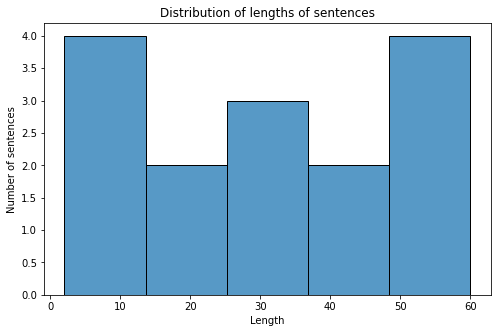

In [63]:
plt.figure(figsize=(8,5))
fig = sns.histplot(lengths, bins=5)
fig.set_title('Distribution of lengths of sentences')
fig.set_xlabel('Length')
fig.set_ylabel('Number of sentences');

Which lengths occur most often?

##### Word Cloud

Word Cloud is a visual representation of most frequent words in a text. The size of the word in a cloud depends on its' frequency.

We will combine our text into one long sentence, since the model works with strings, not lists.

In [67]:
res = " "
for i in data:
    res +=  " ".join([x for x in i])
    
res[:100]

' apple aapl stock fallen recent high however stock may risk dropping plenty catalyst could trigger d'

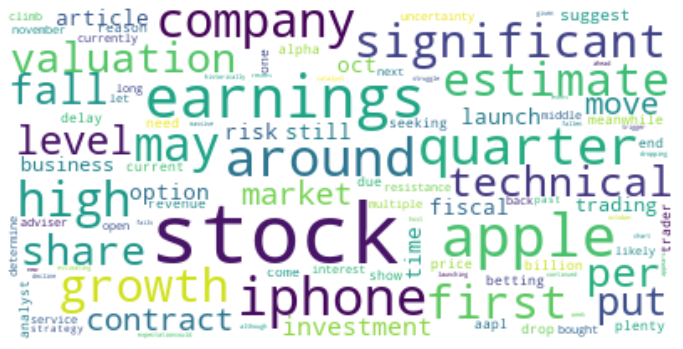

In [68]:
# word-cloud (most frequent words)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(res)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



*   What are the most frequent words?
*   Compare the sentiment of the most frequent words with the aggregate sentiment of the article. 



##### Bigrams and trigrams

Let's count the occurence of bigrams (word pairs) and trigrams (three words in a row) in a sentence. 

We will work with the original text to preserve some information which could be omitted during pre-processing.

In [69]:
original_text = article.text.split('\n\n')

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [72]:
bigrams = get_top_n_bigram(original_text, 15)
bigrams

[('the stock', 11),
 ('in the', 8),
 ('for the', 5),
 ('that the', 4),
 ('by about', 4),
 ('stock is', 4),
 ('the company', 3),
 ('on oct', 3),
 ('first quarter', 3),
 ('estimates may', 3),
 ('it could', 3),
 ('could be', 3),
 ('to come', 3),
 ('this article', 3),
 ('the market', 3)]

In [73]:
trigrams = get_top_n_trigram(original_text, 15)
trigrams

[('the stock is', 3),
 ('the end of', 2),
 ('its fiscal first', 2),
 ('fiscal first quarter', 2),
 ('however if the', 2),
 ('it could be', 2),
 ('could be one', 2),
 ('be one reason', 2),
 ('one reason why', 2),
 ('options traders are', 2),
 ('traders are betting', 2),
 ('are betting that', 2),
 ('that the stock', 2),
 ('estimates may need', 2),
 ('may need to', 2)]

In [74]:
# most frequent word pairs 
df1 = pd.DataFrame(bigrams, columns = ['Bigram' , 'Frequency'])
df1

,Bigram,Frequency
0,the stock,11
1,in the,8
2,for the,5
3,that the,4
4,by about,4
5,stock is,4
6,the company,3
7,on oct,3
8,first quarter,3
9,estimates may,3


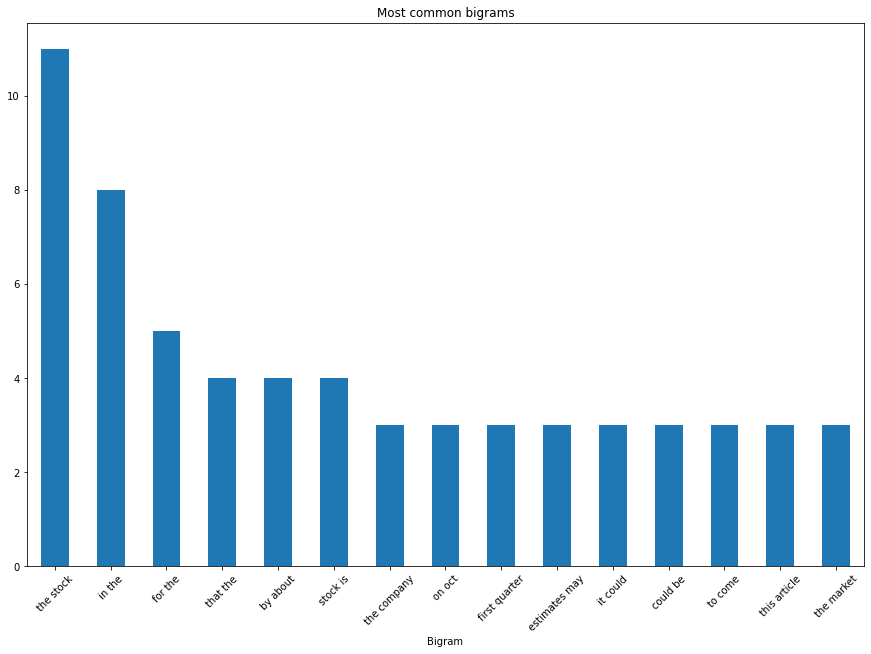

In [75]:
bar = df1.plot.bar(x='Bigram', y='Frequency', rot=45, legend=None, width=0.5, figsize=(15,10));
bar.set_title('Most common bigrams');


*   What are the top-3 word bigrams?

In [76]:
# most frequent trigrams 
df2 = pd.DataFrame(trigrams, columns = ['Trigrams' , 'Frequency'])
df2

,Trigrams,Frequency
0,the stock is,3
1,the end of,2
2,its fiscal first,2
3,fiscal first quarter,2
4,however if the,2
5,it could be,2
6,could be one,2
7,be one reason,2
8,one reason why,2
9,options traders are,2


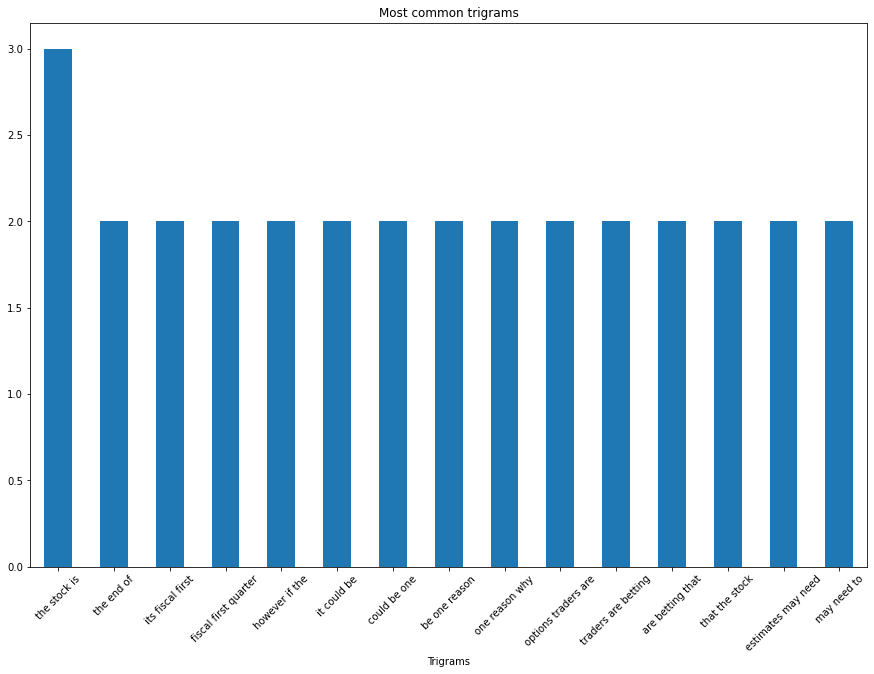

In [77]:
bar2 = df2.plot.bar(x='Trigrams', y='Frequency', rot=45, legend=None, width=0.5, figsize=(15,10));
bar2.set_title('Most common trigrams');


*   What are the top-3 trigrams?

Recommended materials:
* [Kaggle. Sentiment Analysis on Financial News](https://www.kaggle.com/mmmarchetti/sentiment-analysis-on-financial-news)
* [Sentiment Analysis of Stocks from Financial News using Python](https://towardsdatascience.com/sentiment-analysis-of-stocks-from-financial-news-using-python-82ebdcefb638)